In [40]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metric Visualizer [FFT]

In [ ]:
METRICS_PATH = Path("fft_syntethic_metrics.csv")

/scratch_local/ipykernel_1281263/3932149112.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



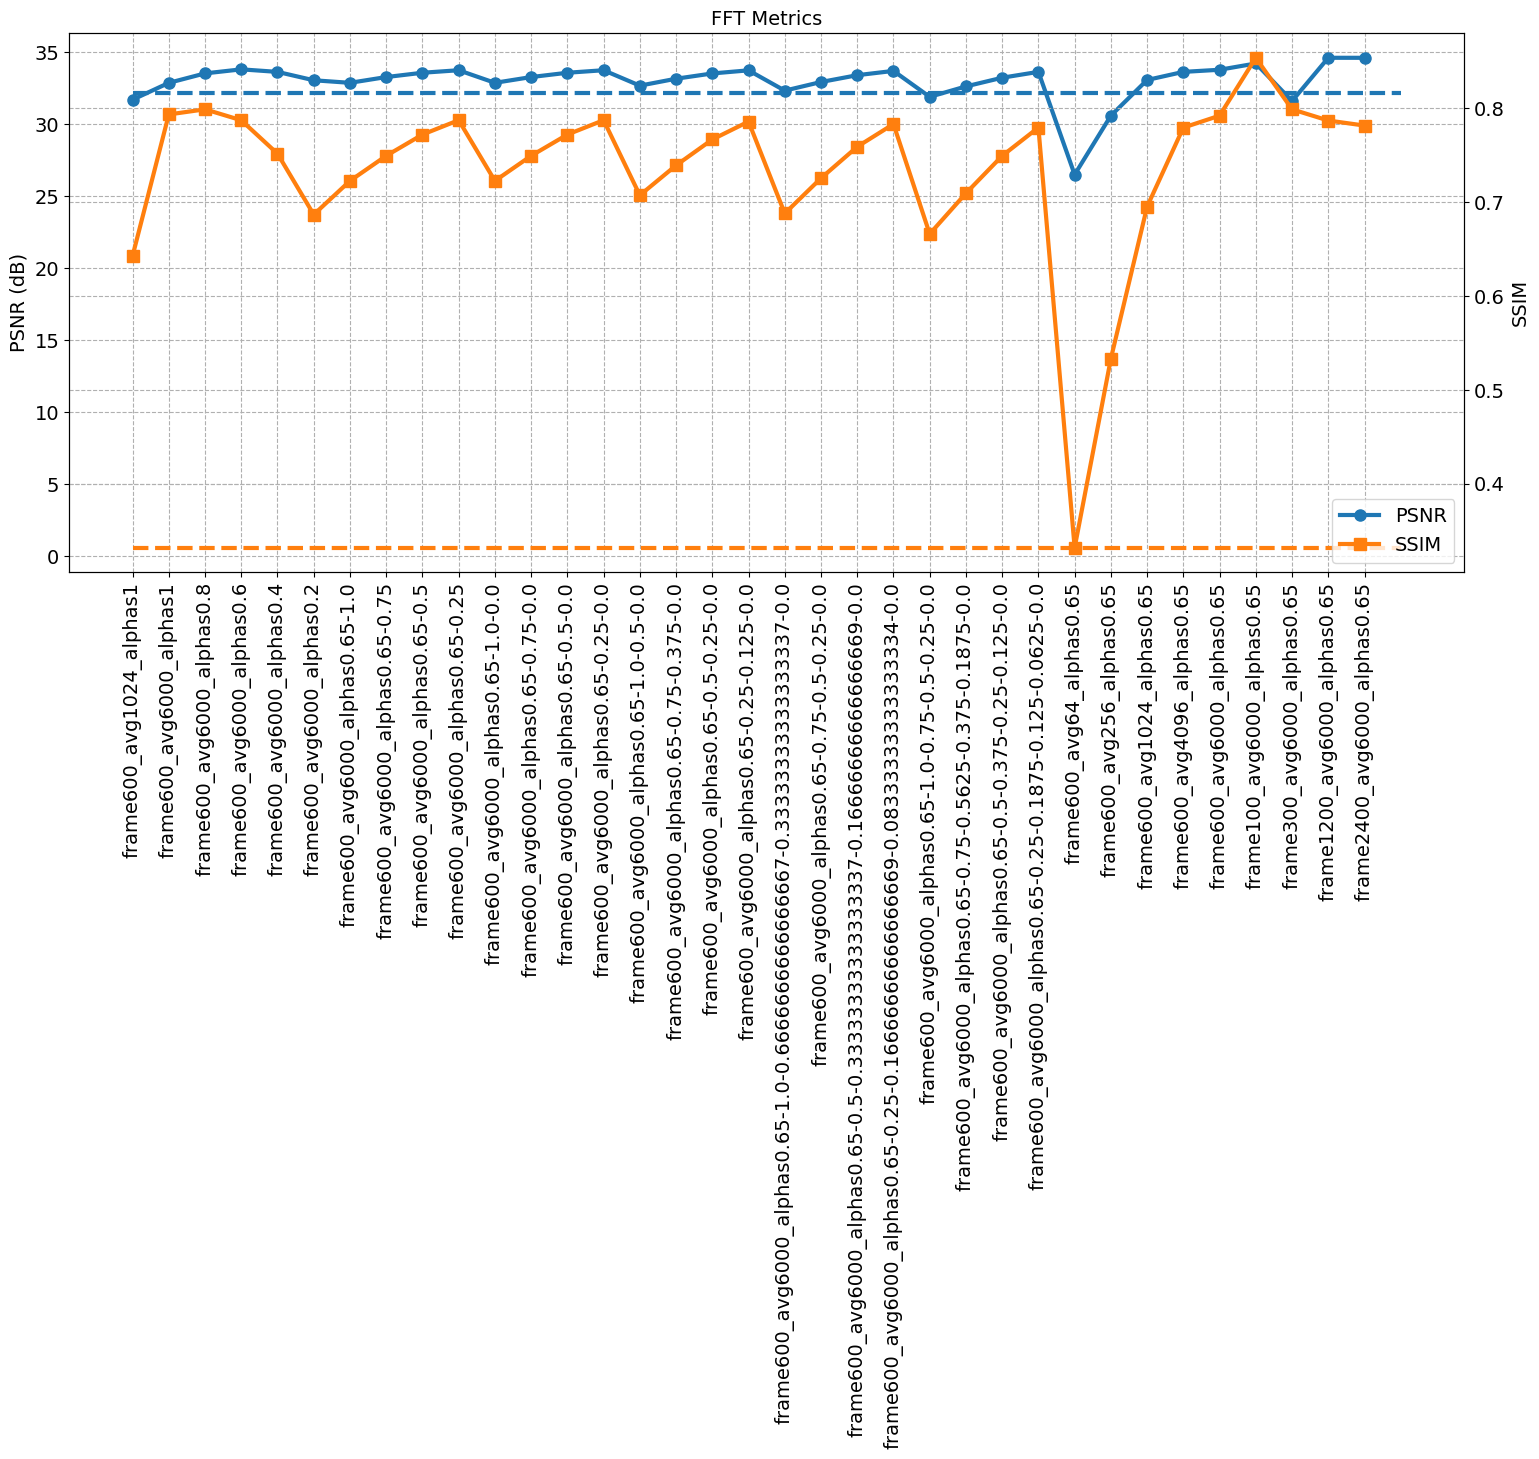

In [46]:
df = pd.read_csv(METRICS_PATH, index_col="suffx")
baseline = df.loc["deepcad"]
df = df.drop(index="deepcad")

fig, ax1 = plt.subplots(figsize=(18, 7))
ax1.set_title("FFT Metrics")
ax1.tick_params(axis="x", labelrotation=90)
ax1.add_line(Line2D([0, len(df)], [baseline.PSNR] * 2, linestyle="--", linewidth=3, color="tab:blue"))
ax1.add_line(Line2D([0, len(df)], [baseline.SSIM]*2, linestyle="--", linewidth=3, color="tab:orange"))

ax1.plot(df.index, df["PSNR"], marker="o", markersize=8, color="tab:blue", label="PSNR", linewidth=3)
ax1.set_ylabel("PSNR (dB)")
# ax1.set_ylim(30, 40)
# ax1.set_yticks(range(30, 41, 2))

ax2 = ax1.twinx()
ax2.plot(df.index, df["SSIM"], marker="s", markersize=8, linewidth=3, color="tab:orange", label="SSIM")
ax2.set_ylabel("SSIM")
# ax2.set_ylim(0, 1)
# ax2.set_yticks([0.2*i for i in range(6)])

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="lower right")
plt.tight_layout()
plt.show()